In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [ ]:
# PUNJAB : 

Saving Punjab_Updated.csv to Punjab_Updated (9).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-null    float64       
 

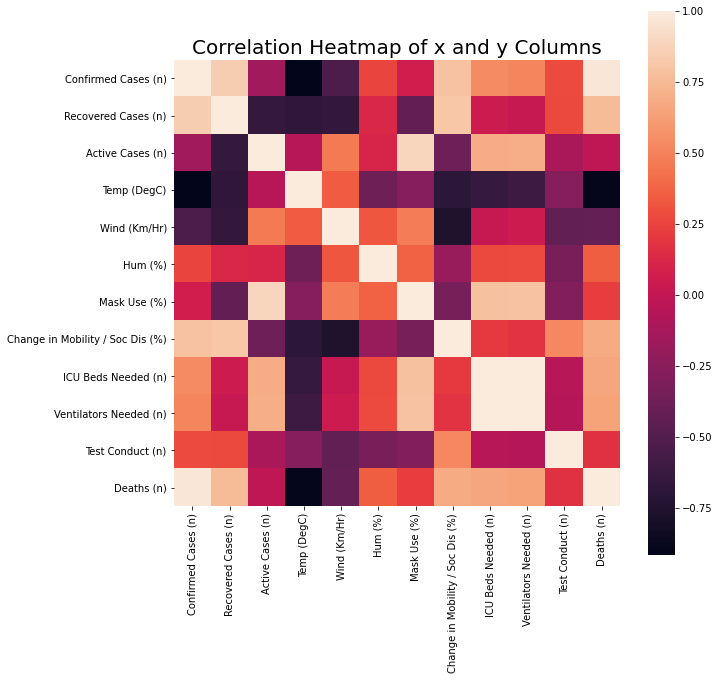

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.848263,-0.150135,-0.914181,-0.531094,0.257816,0.072120,0.797337,0.540985,0.520445,0.276782,0.974353
Recovered Cases (n),0.848263,1.000000,-0.650898,-0.673500,-0.657024,0.132621,-0.424368,0.813962,0.045430,0.024127,0.271168,0.755668
Active Cases (n),-0.150135,-0.650898,1.000000,-0.054273,0.462756,0.117682,0.893829,-0.373222,0.689152,0.699156,-0.104479,-0.015888
Temp (DegC),-0.914181,-0.673500,-0.054273,1.000000,0.349295,-0.379487,-0.270446,-0.687188,-0.639458,-0.615045,-0.266272,-0.895703
Wind (Km/Hr),-0.531094,-0.657024,0.462756,0.349295,1.000000,0.320592,0.478818,-0.761399,0.025370,0.043066,-0.433158,-0.420265
Hum (%),0.257816,0.132621,0.117682,-0.379487,0.320592,1.000000,0.370592,-0.182166,0.268483,0.276573,-0.327543,0.349837
Mask Use (%),0.072120,-0.424368,0.893829,-0.270446,0.478818,0.370592,1.000000,-0.332043,0.787261,0.792669,-0.285650,0.224261
Change in Mobility / Soc Dis (%),0.797337,0.813962,-0.373222,-0.687188,-0.761399,-0.182166,-0.332043,1.000000,0.210907,0.183859,0.525405,0.681760
ICU Beds Needed (n),0.540985,0.045430,0.689152,-0.639458,0.025370,0.268483,0.787261,0.210907,1.000000,0.998897,-0.048790,0.657687
Ventilators Needed (n),0.520445,0.024127,0.699156,-0.615045,0.043066,0.276573,0.792669,0.183859,0.998897,1.000000,-0.065480,0.644451


In [ ]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_punjab = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_punjab.info());
print('\n')
print(df_punjab.describe())

dff = df_punjab.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [ ]:
# data pre processing 

x = df_punjab.iloc[:, 2:-1]
y = df_punjab.iloc[:, -1] 

x = x.drop(['Active Cases (n)','Test Conduct (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 9)
y data shape :  (183,)


x-train data shape :  (146, 9)
x-test data shape :  (37, 9)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [ ]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [2904 2923 2945 2960 2979 2991 3036 3066 3091 3115 3137 3162 3177 3218
 3242 3265 3284 3320 3351 3365 3422 3452 3491 3522 3558 3604 3638 3688
 3732 3783 3831 3858 3900 3921 3959 3982 4013]

 Predicted-y using lin reg: 
 [2791.25 2831.36 2860.49 2884.51 2910.94 2942.97 2975.11 3011.61 3039.47
 3064.81 3096.79 3119.39 3152.71 3159.15 3166.79 3185.26 3209.69 3219.97
 3224.13 3217.62 3236.5  3244.79 3273.88 3303.95 3327.06 3378.95 3416.09
 3441.53 3464.8  3495.41 3531.76 3546.82 3557.25 3580.7  3603.21 3632.1
 3654.11]

Accuracy obt from lin reg model :  95.0  %


In [ ]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(64, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 1ms/step - loss: 868.8806 - mean_squared_error: 1240214.7349
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 188.9357 - mean_squared_error: 53739.8233
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 72.5136 - mean_squared_error: 9580.3873
Epoch 4/250
30/30 [=============

In [ ]:
ypred = model.predict(xts)

ya_punjab = np.array(yts)
yp_punjab = np.array(ypred)

print('\nya_punjab ~vs~ yp_punjab')
for i in range(len(yts)): 
  print(ya_punjab[[i]],'vs',yp_punjab[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_punjab[i]-yp_punjab[i])/ya_punjab[i])

err_punjab = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_punjab,2))*100,' %')


ya_punjab ~vs~ yp_punjab
[2904] vs [2668.067]
[2923] vs [2685.617]
[2945] vs [2701.7432]
[2960] vs [2718.3252]
[2979] vs [2732.6504]
[2991] vs [2745.0967]
[3036] vs [2757.17]
[3066] vs [2775.9363]
[3091] vs [2792.459]
[3115] vs [2809.1602]
[3137] vs [2822.8223]
[3162] vs [2836.975]
[3177] vs [2854.9822]
[3218] vs [2835.4307]
[3242] vs [2851.1118]
[3265] vs [2860.7642]
[3284] vs [2868.3167]
[3320] vs [2882.8604]
[3351] vs [2899.2812]
[3365] vs [2906.2703]
[3422] vs [2919.5513]
[3452] vs [2932.0684]
[3491] vs [2946.3374]
[3522] vs [2965.5632]
[3558] vs [2969.6099]
[3604] vs [2984.409]
[3638] vs [2996.8015]
[3688] vs [3011.7231]
[3732] vs [3024.958]
[3783] vs [3043.438]
[3831] vs [3055.568]
[3858] vs [3076.609]
[3900] vs [3090.4258]
[3921] vs [3100.5645]
[3959] vs [3112.9453]
[3982] vs [3129.0215]
[4013] vs [3145.9397]

Accuracy obt from deep nueral network :  86.0  %


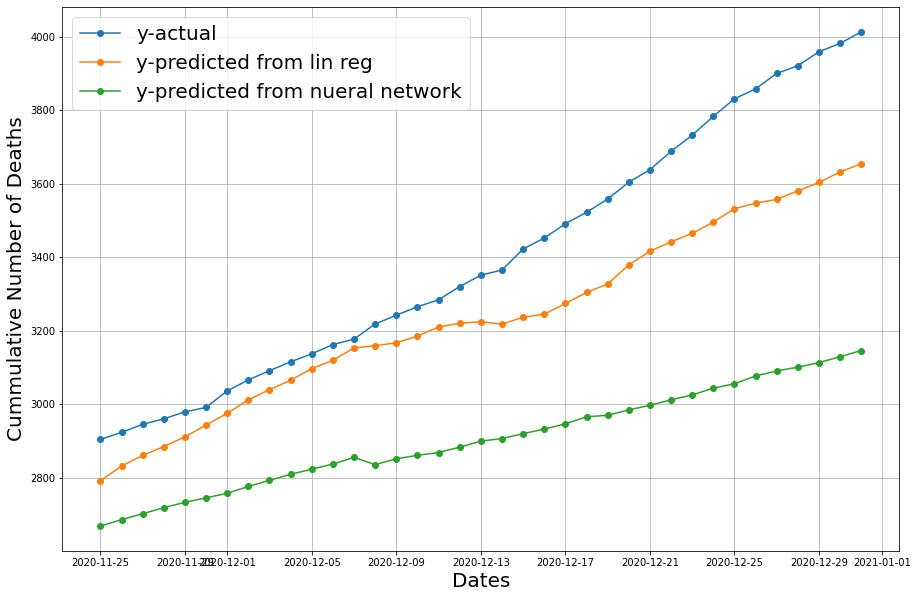

In [ ]:
dts = df_punjab['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_punjab, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_punjab, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 